In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data ready for KNN.")


Data ready for KNN.


In [3]:
# Create KNN classifier with K=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

print("Model trained and predictions made.")


Model trained and predictions made.


Accuracy: 1.00


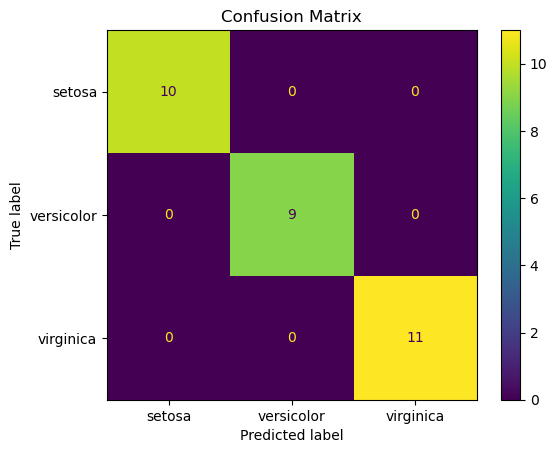

In [4]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


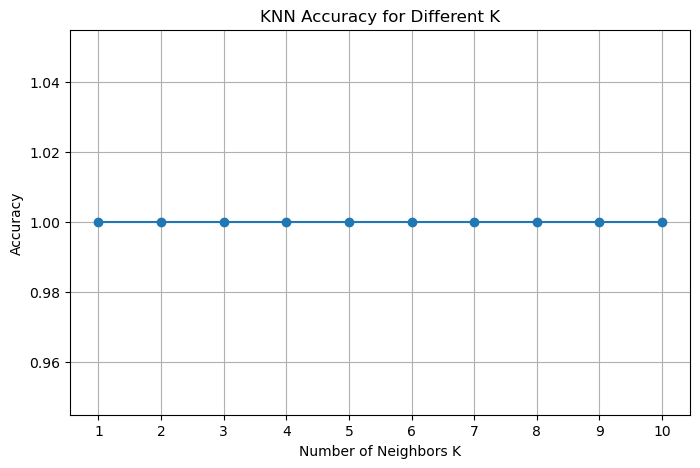

In [5]:
# Try multiple K values
k_range = range(1, 11)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(k_range, accuracies, marker='o')
plt.title("KNN Accuracy for Different K")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Accuracy")
plt.xticks(k_range)
plt.grid(True)
plt.show()


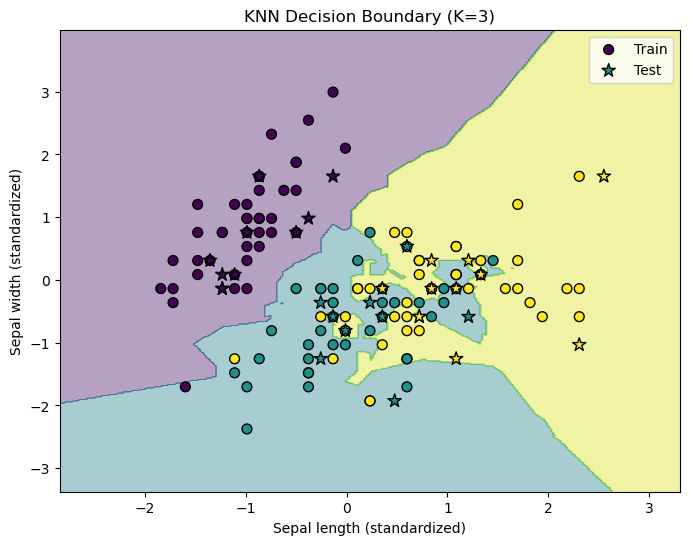

In [6]:
# Use only first 2 features for easy visualization
X = iris.data[:, :2]  # Sepal length & Sepal width
y = iris.target

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Plot decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=50, label="Train")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='*', s=100, edgecolor='k', label="Test")
plt.xlabel("Sepal length (standardized)")
plt.ylabel("Sepal width (standardized)")
plt.title("KNN Decision Boundary (K=3)")
plt.legend()
plt.show()
